In [1]:
from datetime import datetime, date, time, timedelta
import matplotlib.dates as md
from matplotlib import pyplot as plt
import csv
import numpy as np
import pywt
from pywt import wavedec
import pandas as pd

def plotGSRdata(datetime,eda):
    """Input: a datetime object in format '2017-03-29T12:55:59.500000'"""
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S%f')
    ax.xaxis.set_major_formatter(xfmt)
    
    plt.plot(datetime,eda)
    plt.show()

def getDateTimeStamp(timestamp):
    """Use this function after the upload to convert timestamps to iso format
       Input
           - timestamp: a string of the format '04082017' for 'DOW:HH:MM:SS'
       Output
           - a datetime object
    """
       #parse the time stamp, from R->L to work around leading zero troubles
    dow = int(timestamp[:-6])
    hr = int(timestamp[-6:-4])
    mm = int(timestamp[-4:-2])
    ss = int(timestamp[-2:])

    t = time(hr, mm,ss) #24Hour, Min, Sec, Microsecond
    
    datestamp = file.split('.')[-2]
    YYYY = datestamp[4:]
    MM = datestamp[:2]
    DD = datestamp[2:4]
    date = YYYY + '-' + MM + '-' + DD
    date

    #grab the day of the week when the data was downloadedM
    dt_day = datetime.strptime(date, '%Y-%m-%d')
    
    dt = datetime.combine(dt_day, t)
    return (dt)


def DOWtoDatetime(file,DOW):
    """Input is a 'u1715@lab_raw.gsr.2.05082017.csv' format
    Input
        - file: the file string of format 'u1715@lab_raw.gsr.2.05252017.csv'
        - DOW : the day of the week string, '00'= Sun, '06'=Sat
    Ouput
        - a date string in iso format '2017-05-19T00:00:00'
    """
    
    datestamp = file.split('.')[-2]
    YYYY = datestamp[4:]
    MM = datestamp[:2]
    DD = datestamp[2:4]
    date = YYYY + '-' + MM + '-' + DD
    date

    #grab the day of the week when the data was downloadedM
    dt_day = datetime.strptime(date, '%Y-%m-%d')

    #create a dictionary to return the date for a given dow timestamp
    experiment_dates = {'0' + str(dt_day.isoweekday()): dt_day.isoformat()}
    for d in [1,2,3,4,5,6]:
        dow = (dt_day-timedelta(days=d)).isoweekday()
        if dow == 7:
            dow = 0
        date = (dt_day-timedelta(days=d)).isoformat()
        exp = {'0' + str(dow): date}
        experiment_dates.update(exp)


    #return the date string in iso format
    return (experiment_dates[DOW])


def extrapTime(endtime_dt,N,T):
    """Returns a vector of length 128 with 500ms sample spacing
    Input:
       N = the output vector length
       T = timestep period in microseconds
       endtime_dt: a datetime object, representing the last sample of the DWT
       
    Output:
        a vector datetime objects of size N, with timesteps of T microseconds, ending at time endtime_dt"""
    
    
    etime = []
    for i in range(N):
        samptime = endtime_dt - timedelta(0,0,T) #subtract 0.5 seconds (5e5 microseconds)
        etime.append(samptime)
        endtime_dt = samptime

    return (etime[::-1])

def plotEDA(t,final_eda,filename):
    
    p_index = file.index('@')
    
    #grab the participant
    participant = filename[(p_index-2):p_index]
    
    # find the experiment setting from the timestamp
    if (filename.find('lab') > 0):
        setting = 'Lab'
    else:
        setting = 'Field'

    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(t,final_eda)
    plt.title('Participant ' + participant + ' in ' + setting)
    plt.xlabel('Time')
    plt.ylabel('Skin Conductance (uS)')
    plt.grid(True)
    plt.show()
    
    
# extrapTime example:
# timevec = extrapTime(dt,128,500000)
# #print the output
# [ x.isoformat() for x in timevec[-5:]]
# output
# ['2017-03-29T12:55:56.500000',
#  '2017-03-29T12:55:57',
#  '2017-03-29T12:55:57.500000',
#  '2017-03-29T12:55:58',
#  '2017-03-29T12:55:58.500000']


# # see https://docs.python.org/2/library/datetime.html#datetime.datetime.strftime for formatting specs
# d = datetime.strptime('2017-03-29', '%Y-%m-%d')
# timestamp = '03125559'


# dt = getDateTimeStamp('03125559')
# print(dt.isoformat())



# dt2 = dt + timedelta(0,0,500000)
# t = [dt,dt2]
# y = [10, 50]

# plotGSRdata(t,y)




#get the real time dates for the dat provided
# file = '../data/gsrdata.csv'
# file = '../data/u999@field.gsr.2.p0.04242017.csv'
# file = '../data/u172@lab.gsr.5.p0.04252017.csv'
# file = input('Enter the data file name \'XXX.csv\': ')
# file = '../data/validation_wAmulet_03292017.txt'
# file = '../data/dr_appt_03292017.txt'
# file = '../data/data_03142017.txt'
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1715@lab_raw.gsr.2.05082017.csv'



def edaDecompress(file):

#     filedate = file[-12:-4]
#     print(filedate)
    p_index = file.index('@')

    #grab the participant number
    participant = file[(p_index-2):p_index]
    participant
    
    # find the experiment setting from the timestamp
    if (file.find('lab') > 0):
        setting = 'Lab'
    else:
        setting = 'Field'
    setting
    
    # Find the range of dates the experiment took place
    # create a dictionary to look up the iso date by DOW field
    
    datestamp = file.split('.')[-2]
    YYYY = datestamp[4:]
    MM = datestamp[:2]
    DD = datestamp[2:4]
    date = YYYY + '-' + MM + '-' + DD
    date

    #grab the day of the week when the data was downloadedM
    dt_day = datetime.strptime(date, '%Y-%m-%d')
    dt_day.isoformat()

    dt_day.isoweekday()

    #create a dictionary to return the date for a given dow timestamp
    experiment_dates = {'0' + str(dt_day.isoweekday()): dt_day.isoformat()}
    for d in [1,2,3,4,5,6]:
        dow = (dt_day-timedelta(days=d)).isoweekday()
        if dow == 7:
            dow = 0
        date = (dt_day-timedelta(days=d)).isoformat()
        exp = {'0' + str(dow): date}
        experiment_dates.update(exp)

    experiment_dates

    

    data = []
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='|')
        for row in reader:
            data.append(row)

    events_str = np.array(data[2][:])
    compdat_str = np.array(data[7:][:])


    #convert to integers
    dat = []
    # for i in range(len(compdat_str)):
    for i in range(len(compdat_str)-1):
        t = compdat_str[i][0]
        cA = [int(x) for x in compdat_str[i][1].split(',')]
        cD = [int(x) for x in compdat_str[i][2].split(',')]
        cDind = [int(x) for x in compdat_str[i][3].split(',')]

        dat.append([t, cA,cD,cDind])

    # parse the time stamp. The date on the file name should be the starting date of the experiment
    datestamp = file.split('.')[-2]
    YYYY = datestamp[4:]
    MM = datestamp[:2]
    DD = datestamp[2:4]
    date = YYYY + '-' + MM + '-' + DD
    date

    #grab the day of the week when the data was downloadedM
    dt_day = datetime.strptime(date, '%Y-%m-%d')
#     print('weekday',dt_day.isoformat()) #this should be 1 for monday 2017-05-08

    # grab the events
    evts = events_str[0].split(',')
    evts_short = []
    for e in evts:
        if (str(e) > '00000000'):
            evts_short.append(e)
    evts_short  
    Events = [getDateTimeStamp(x) for x in evts_short]
    Events

    
    ##############################
    #compose the signal
    ##############################
    sig = np.zeros(128)
    wavelet = 'db3'
    coef_zeros = pywt.wavedec(sig,'db3',level=4,mode='symmetric')
    recontotal = []
    timetotal  = []


    for k in range(len(dat)):
        #construct the compressed wavelet transform
        coef = coef_zeros
        tvec = np.zeros(128)

        cA4 = dat[k][1]
        cD4 = dat[k][2]
        D4ind = dat[k][3]
        emp = np.zeros(12)

        #populate the cD4 values
        for i in [0,1]:
            emp[int(D4ind[i])] = cD4[i] 

        coef[0] = cA4 #12 values of the cA4 vector
        coef[1] = emp #12 values of cD4 with only 2 populated

        #reconstruct the GSR signal
        reconsig = pywt.waverec(coef,'db3',mode='symmetric')

        #convert from 10nS to uS
        reconsig = reconsig/100
        recontotal.append(reconsig)

        #reconstruct the time signal
        stamp = str(dat[k][0]) #this is the timestamp within the compressed data file '01230159'
    #     etime = getEpoch(RTC_dates[stamp[:2]],stamp)
    #     etime = getEpoch(date,stamp)
        timestamp = getDateTimeStamp(stamp)
    #     wt_endtime = getDateTimeStamp(timestamp)
        tvec = extrapTime(endtime_dt=timestamp,N=128,T=500000)
        timetotal.append(tvec) #in Epoch time


    #########################################

    #flatten out the arrays
    final_eda = np.array(recontotal).flatten()
    t = np.array(timetotal).flatten()
    
    return (t, final_eda)


    

#     filedate = file[-12:-4]
#     p_index = file.index('@')

#     #grab the participant
#     participant = file[(p_index-2):p_index]
    

In [2]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1715@lab_raw.gsr.2.05082017.csv'
edaDecompress(file)

AttributeError: 'list' object has no attribute 'shape'

In [3]:
def DOWtoDatetime(file,DOW):
    """Input is a 'u1715@lab_raw.gsr.2.05082017.csv' format
    Input
        - file: the file string of format 'u1715@lab_raw.gsr.2.05252017.csv'
        - DOW : the day of the week string, '00'= Sun, '06'=Sat
    Ouput
        - a date string in iso format '2017-05-19T00:00:00'
    """
    
    datestamp = file.split('.')[-2]
    YYYY = datestamp[4:]
    MM = datestamp[:2]
    DD = datestamp[2:4]
    date = YYYY + '-' + MM + '-' + DD
    date

    #grab the day of the week when the data was downloadedM
    dt_day = datetime.strptime(date, '%Y-%m-%d')

    #create a dictionary to return the date for a given dow timestamp
    experiment_dates = {'0' + str(dt_day.isoweekday()): dt_day.isoformat()}
    for d in [1,2,3,4,5,6]:
        dow = (dt_day-timedelta(days=d)).isoweekday()
        if dow == 7:
            dow = 0
        date = (dt_day-timedelta(days=d)).isoformat()
        exp = {'0' + str(dow): date}
        experiment_dates.update(exp)


    #return the date string in iso format
    return (experiment_dates[DOW])
    
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1715@lab_raw.gsr.2.05082017.csv'
DOWtoDatetime('u1715@lab_raw.gsr.2.05252017.csv','05')

'2017-05-19T00:00:00'

In [10]:
for d in [1,2,3,4,5,6]:
    print ((dt_day-timedelta(days=d)).isoweekday())
    
    
# x = dt_day-timedelta(days=1)
# x.isoweekday()
# dt_day.isoformat()

# OUTPUT
# [{1: '2017-05-08T00:00:00'},
#  {7: '2017-05-07T00:00:00'},
#  {6: '2017-05-06T00:00:00'},
#  {5: '2017-05-05T00:00:00'},
#  {4: '2017-05-04T00:00:00'},
#  {3: '2017-05-03T00:00:00'},
#  {2: '2017-05-02T00:00:00'}]

NameError: name 'dt_day' is not defined

In [11]:
experiment_dates = {}
for day in [1,2,3,4,5,6]:
    

#     print('weekday',dt_day.isoformat()) #this should be 1 for monday 2017-05-08


SyntaxError: unexpected EOF while parsing (<ipython-input-11-87b098da2eb2>, line 5)

In [12]:
getDateTimeStamp('04082017')

datetime.datetime(2017, 5, 8, 8, 20, 17)

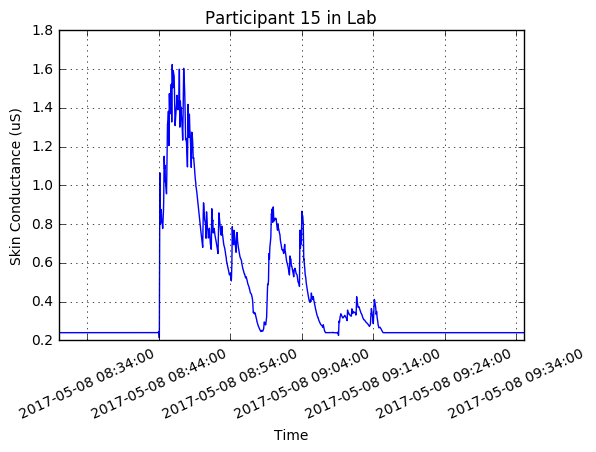

In [13]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1715@lab_raw.gsr.2.05082017.csv'
t,eda = edaDecompress(file)
plotEDA(t,eda,file)

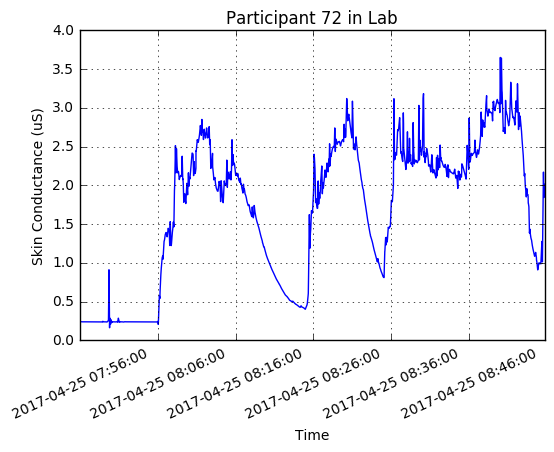

7168

In [14]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u172@lab.gsr.5.p0.04252017.csv'
t,eda = edaDecompress(file)
plotEDA(t,eda,file)

len(t)
    

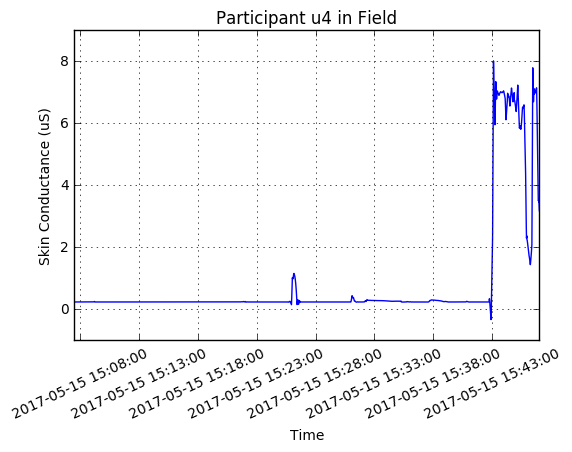

4736

In [15]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u4@field_raw.gsr.3.05152017.csv'
t,eda = edaDecompress(file)
plotEDA(t,eda,file)

len(t)
    

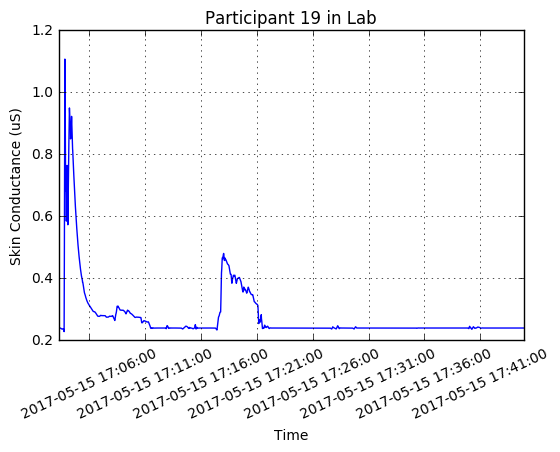

4992

In [16]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1719@lab_raw.gsr.2.05152017.csv'
t,eda = edaDecompress(file)
plotEDA(t,eda,file)

len(t)
    

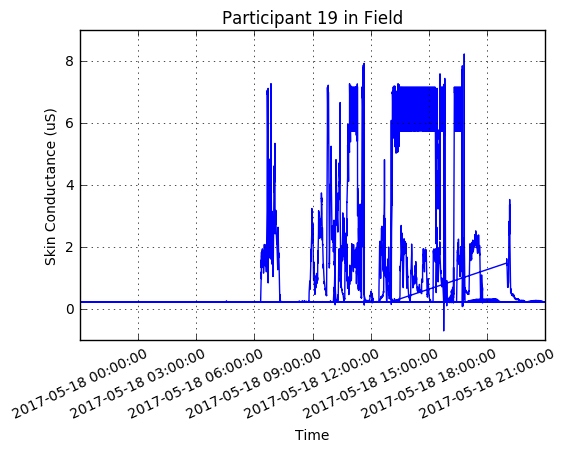

In [42]:
file = '/Users/gunnarpope/repos/gsr_rev10/data/u1719@field_raw.gsr.2.05182017.csv'
t,eda = edaDecompress(file)
plotEDA(t,eda,file)

In [51]:
data = pd.DataFrame(np.zeros((len(t),2)),columns=['Timestamp','EDA [uS]'])
data['EDA [uS]'] = eda
data['Timestamp'] = t
# data.index = pd.DatetimeIndex(start=startTime,periods = len(data),freq='500L')
datasorted = data.sort(['Timestamp'],ascending=[True])
datasorted

/Users/gunnarpope/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Timestamp  EDA [uS]
16000  2017-05-17 23:59:59.000  0.242650
77440  2017-05-17 23:59:59.000  0.240000
138880 2017-05-17 23:59:59.000  0.240000
16001  2017-05-17 23:59:59.500  0.242072
77441  2017-05-17 23:59:59.500  0.240000
138881 2017-05-17 23:59:59.500  0.240000
77442  2017-05-18 00:00:00.000  0.240000
16002  2017-05-18 00:00:00.000  0.241516
138882 2017-05-18 00:00:00.000  0.240000
16003  2017-05-18 00:00:00.500  0.240930
77443  2017-05-18 00:00:00.500  0.240000
138883 2017-05-18 00:00:00.500  0.240000
77444  2017-05-18 00:00:01.000  0.240000
138884 2017-05-18 00:00:01.000  0.240000
16004  2017-05-18 00:00:01.000  0.240773
138885 2017-05-18 00:00:01.500  0.240000
77445  2017-05-18 00:00:01.500  0.240000
16005  2017-05-18 00:00:01.500  0.240788
138886 2017-05-18 00:00:02.000  0.240000
16006  2017-05-18 00:00:02.000  0.240752
77446  2017-05-18 00:00:02.000  0.240000
138887 2017-05-18 00:00:02.500  0.240000
16007  2017-05-18 00:00:02.500  0.240821
77447  2017-05-18 00:00:02.500  0.240000
138888 2017-05-18 00:00:03.000  0.240000
77448  2017-05-18 00:00:03.000  0.240000
16008  2017-05-18 00:00:03.000  0.240763
77449  2017-05-18 00:00:03.500  0.240000
138889 2017-05-18 00:00:03.500  0.240000
16009  2017-05-18 00:00:03.500  0.240696
...                        ...       ...
15990  2017-05-18 23:57:58.000  0.240000
77430  2017-05-18 23:57:58.000  0.240000
138870 2017-05-18 23:57:58.000  0.240000
77431  2017-05-18 23:57:58.500  0.240000
15991  2017-05-18 23:57:58.500  0.240000
138871 2017-05-18 23:57:58.500  0.240000
77432  2017-05-18 23:57:59.000  0.240000
15992  2017-05-18 23:57:59.000  0.240000
138872 2017-05-18 23:57:59.000  0.240000
77433  2017-05-18 23:57:59.500  0.240000
138873 2017-05-18 23:57:59.500  0.240000
15993  2017-05-18 23:57:59.500  0.240000
77434  2017-05-18 23:58:00.000  0.240000
138874 2017-05-18 23:58:00.000  0.240000
15994  2017-05-18 23:58:00.000  0.240000
138875 2017-05-18 23:58:00.500  0.240000
15995  2017-05-18 23:58:00.500  0.240000
77435  2017-05-18 23:58:00.500  0.240000
138876 2017-05-18 23:58:01.000  0.240000
15996  2017-05-18 23:58:01.000  0.240000
77436  2017-05-18 23:58:01.000  0.240000
77437  2017-05-18 23:58:01.500  0.240000
138877 2017-05-18 23:58:01.500  0.240000
15997  2017-05-18 23:58:01.500  0.240000
138878 2017-05-18 23:58:02.000  0.240000
15998  2017-05-18 23:58:02.000  0.240000
77438  2017-05-18 23:58:02.000  0.240000
138879 2017-05-18 23:58:02.500  0.240000
15999  2017-05-18 23:58:02.500  0.240000
77439  2017-05-18 23:58:02.500  0.240000

[168960 rows x 2 columns]

In [ ]:
# the timestamps are not covering the whole range of days
